In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

#Load Dataset

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
df = df.drop('Person ID', axis = 1)
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
df[['Systolic pressure', 'Diastolic pressure']] = df['Blood Pressure'].str.split("/", expand = True)
df[['Systolic pressure', 'Diastolic pressure']]=df[['Systolic pressure', 'Diastolic pressure']].astype(int)
df.drop(columns='Blood Pressure',inplace=True)

In [ ]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic pressure        374 non-null    int64  
 12  Diastolic pressure       374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic pressure,Diastolic pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


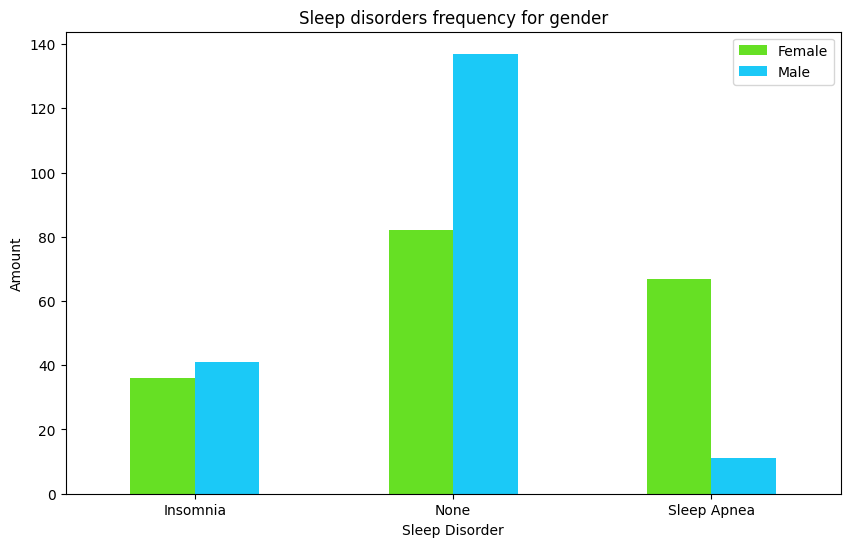

In [ ]:
pd.crosstab(df['Sleep Disorder'], df['Gender']).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["#66E024", "#1BC9F7"])

plt.title('Sleep disorders frequency for gender')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)

plt.show()

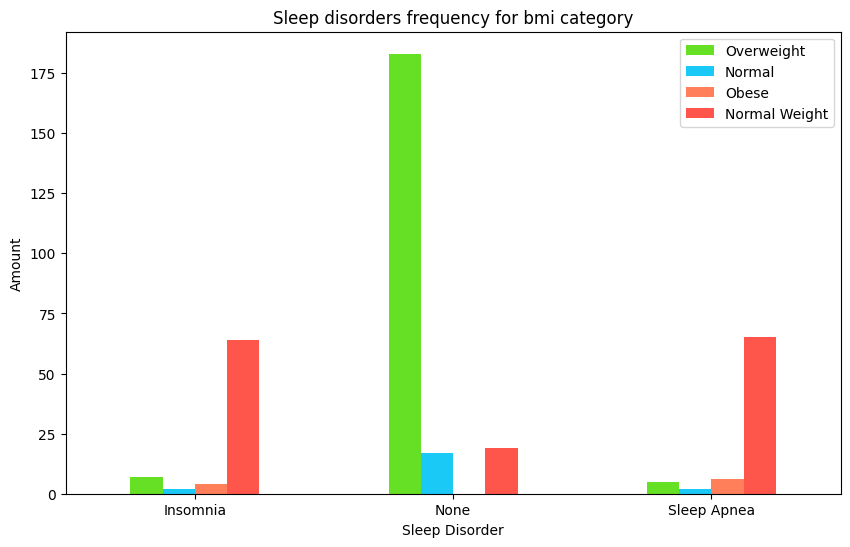

In [ ]:
pd.crosstab(df['Sleep Disorder'], df['BMI Category']).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["#66E024", "#1BC9F7","#FF7F5B","#FF564C"])

plt.title('Sleep disorders frequency for bmi category')
plt.ylabel('Amount')
plt.legend(['Overweight', 'Normal', 'Obese','Normal Weight'])
plt.xticks(rotation = 0)

plt.show()

<ipython-input-15-00fcbd13b949>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


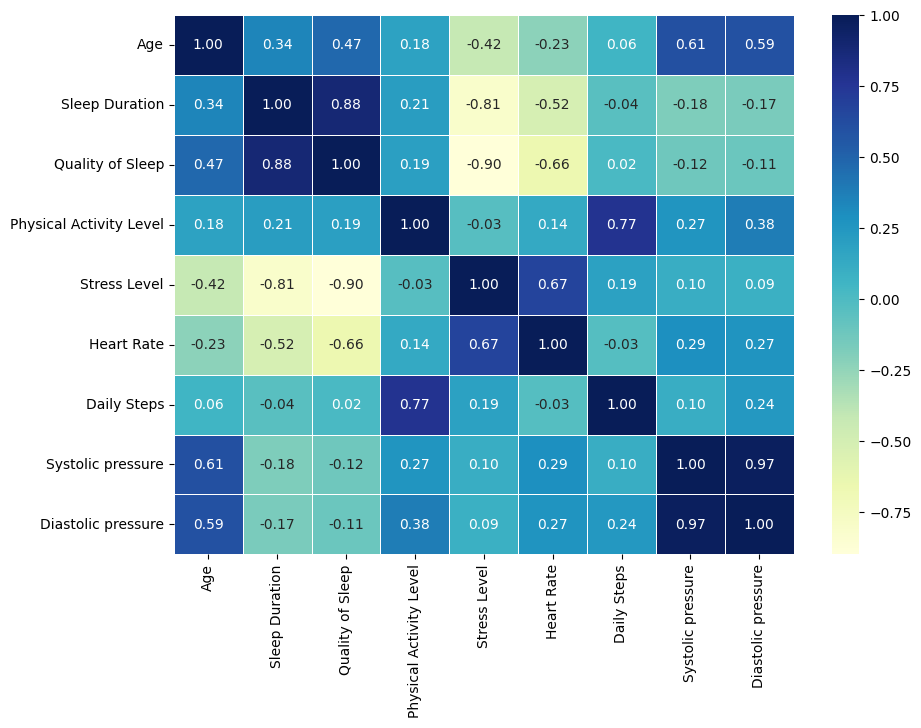

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

#Detecting Outliers

In [ ]:
def detect_outliers(df, features):
  outlier_indices = []

  for f in features:
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    IQR = Q3 - Q1

    outlier_step = IQR * 1.5
    outlier_list_column = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_column)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 0)
  return multiple_outliers

In [ ]:
df.loc[detect_outliers(df, ['Age',
                            'Sleep Duration',
                            'Physical Activity Level',
                            'Heart Rate',
                            'Daily Steps',
                            'Systolic pressure',
                            'Diastolic pressure'])]
#All outliers in 'Heart Rate' column

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic pressure,Diastolic pressure
3,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
5,1,28,9,5.9,4,30,8,2,85,3000,Insomnia,140,90
6,1,29,10,6.3,6,40,7,2,82,3500,Insomnia,140,90
16,0,29,5,6.5,5,40,7,1,80,4000,Sleep Apnea,132,87
18,0,29,5,6.5,5,40,7,1,80,4000,Insomnia,132,87
80,0,34,8,5.8,4,32,8,3,81,5200,Sleep Apnea,131,86
81,0,34,8,5.8,4,32,8,3,81,5200,Sleep Apnea,131,86
93,1,35,3,7.4,7,60,5,2,84,3300,Sleep Apnea,135,88
145,0,38,3,7.4,7,60,5,2,84,3300,Sleep Apnea,135,88


#Modeling

In [ ]:
le = preprocessing.LabelEncoder()
df['Occupation']=le.fit_transform(df['Occupation'])
df['BMI Category']=le.fit_transform(df['BMI Category'])
df['Gender']=le.fit_transform(df['Gender'])


In [ ]:
X = df.drop('Sleep Disorder', axis = 1)

y = df['Sleep Disorder'].values

le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic pressure,Diastolic pressure
0,1,27,9,6.1,6,42,6,3,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000,140,95
370,0,59,5,8.0,9,75,3,3,68,7000,140,95
371,0,59,5,8.1,9,75,3,3,68,7000,140,95
372,0,59,5,8.1,9,75,3,3,68,7000,140,95


In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic pressure,Diastolic pressure
192,1,43,7,6.5,6,45,7,3,72,6000,130,85
75,1,33,1,6.0,6,30,8,0,72,5000,125,80
84,1,35,9,7.5,8,60,5,1,70,8000,120,80
362,0,59,5,8.2,9,75,3,3,68,7000,140,95
16,0,29,5,6.5,5,40,7,1,80,4000,132,87


In [ ]:
y_train

array([0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1])

In [ ]:
X_test.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic pressure,Diastolic pressure
329,0,53,2,8.5,9,30,3,0,65,5000,125,80
33,1,31,1,6.1,6,30,8,0,72,5000,125,80
15,1,29,1,6.0,6,30,8,0,70,8000,120,80
325,0,53,2,8.5,9,30,3,0,65,5000,125,80
57,1,32,1,6.0,6,30,8,0,72,5000,125,80


In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 2, 2])

In [ ]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(1)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.8666666666666667, 'Logistic Regression': 0.84, 'Random Forest': 0.88}

#Model Comparision

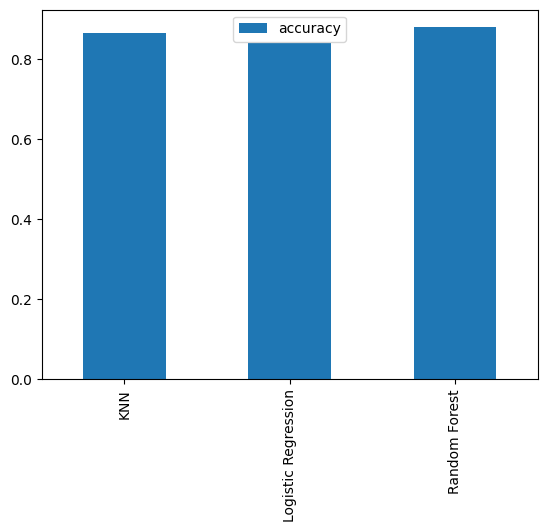

In [ ]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()
plt.show()

#Hyperparameter Tuning and Cross-Validation

##Tune KNN by hand

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[0.9063545150501672,
 0.903010033444816,
 0.9130434782608695,
 0.903010033444816,
 0.882943143812709,
 0.882943143812709,
 0.8729096989966555,
 0.8662207357859532,
 0.8662207357859532,
 0.862876254180602,
 0.862876254180602,
 0.862876254180602,
 0.862876254180602,
 0.8561872909698997,
 0.8561872909698997,
 0.8528428093645485,
 0.8528428093645485,
 0.8461538461538461,
 0.842809364548495,
 0.8394648829431438]

In [ ]:
test_scores

[0.8533333333333334,
 0.8533333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.8533333333333334,
 0.84]

Maximum KNN score on the test data : 86.67%


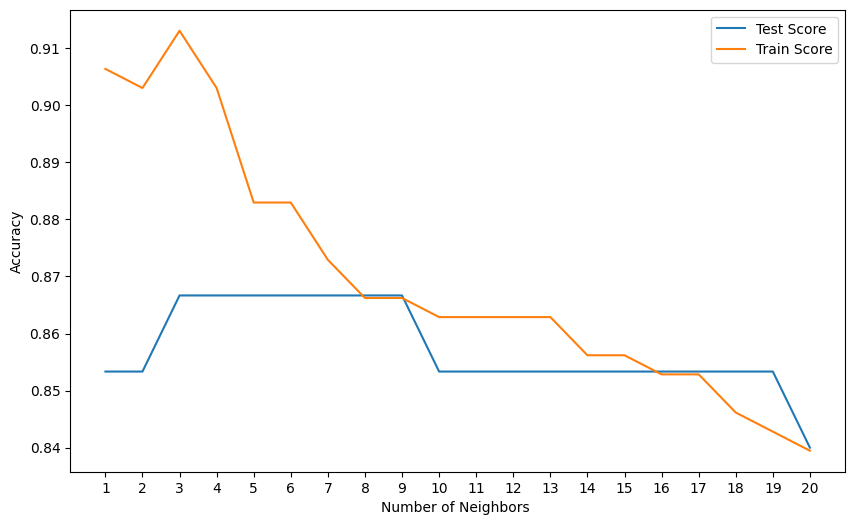

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.legend()

print(f'Maximum KNN score on the test data : {max(test_scores)*100:.2f}%')

##Tune models with GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(),
                  grid_params,
                  verbose = True,
                  cv=5,
                  n_jobs = -1)

g_res=gs.fit(X_train, y_train)
g_res

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [ ]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
gs.score(X_test, y_test)

0.8666666666666667

In [ ]:
g_res.best_score_

0.8696045197740114

##Tune models with RandomSearchCV

In [ ]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver':['liblinear']}

rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'bootstrap': [True, False]}    # method used to sample data points

In [ ]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8933333333333333

In [ ]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

r_f=rs_rf.fit(X_train, y_train)
r_f

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_depth': 5,
 'bootstrap': False}

In [ ]:
r_f.best_score_

0.9197175141242939